

```
# This is formatted as code
```

## Install Depedencies

In [1]:
!pip install unsloth
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git
!pip install bitsandbytes unsloth_zoo
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: unsloth 2025.3.19
Uninstalling unsloth-2025.3.19:
  Successfully uninstalled unsloth-2025.3.19
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-req-build-xl8zyqqr
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-req-build-xl8zyqqr
  Resolved https://github.com/unslothai/unsloth.git to commit f6f5e6397acfb5737dcb2062a72e860cc3657f6f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2025.3.19-py3-none-any.whl size=192490 sha256=7670c5667d8ef1c5d5e837c187d89aafb64a35e939b0cc999ed4a709dff951e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-mpwo2vbk/wheels/d1/17/05/850ab10c33284a4763b0595cd8ea9d01fce6e221cac24b3c01
Successfully built unsloth


## Load Pre-Trained Model

In [2]:
from unsloth import FastLanguageModel
import torch
import numpy as np

max_seq_length = 8096
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/DeepSeek-R1-Distill-Llama-8B",
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch Gemma3ForConditionalGeneration.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

## Test Before Training

In [3]:
prompt_style = """
# Role and Task

You are an experienced HR and now you will review a resume then extract key information from it.

# Input Format

The input is the resume text, and you will review it.

# Output Format

Your response should be ONLY in the following JSON format:
{{
  "skills": array[string],
  "education": array[string],
  "experience": array[string]
}}

Example:
{{
  "skills": [
      "Accounting",
      "ads",
      "advertising",
      "analytical skills",
      "benefits",
      "billing",
      "budgeting",
      "clients",
      "Customer Service",
      "data analysis",
      "delivery",
      "documentation",
      "employee relations",
      "financial management",
      "government relations",
      "Human Resources",
      "insurance",
      "labor relations",
      "layout",
      "Marketing",
      "marketing collateral",
      "medical billing",
      "medical terminology",
      "office",
      "organizational",
      "payroll",
      "performance reviews",
      "personnel",
      "policies",
      "posters",
      "presentations",
      "public relations",
      "purchasing",
      "reporting",
      "statistics",
      "website"
    ],
    "education": [
      "Jefferson College, Business Administration",
      "Sainte Genevieve Senior High, High School Diploma"
    ],
    "experience": [
      "HR Administrator/Marketing Associate",
      "Advanced Medical Claims Analyst",
      "Assistant General Manager",
      "Executive Support / Marketing Assistant",
      "Reservation & Front Office Manager",
      "Owner/ Partner",
      "Price Integrity Coordinator"
    ]
}}

 - For education, only return the school, major and degree, if any field is not availible, ignore.
 - For experience, only return the roles.
 - Your response should be only the JSON object, without other text or explaination
 - If there's any field that you can't recognize, set it as an empty array.


# Input

Here is the resume text:
{}

### Response
<think>{}"""

question = "         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management, leadership and performance assessment.        Experience      HR Administrator/Marketing Associate\n\nHR Administrator     Dec 2013   to   Current      Company Name   \uff0d   City  ,   State     Helps to develop policies, directs and coordinates activities such as employment, compensation, labor relations, benefits, training, and employee services.  Prepares employee separation notices and related documentation  Keeps records of benefits plans participation such as insurance and pension plan, personnel transactions such as hires, promotions, transfers, performance reviews, and terminations, and employee statistics for government reporting.  Advises management in appropriate resolution of employee relations issues.  Administers benefits programs such as life, health, dental, insurance, pension plans, vacation, sick leave, leave of absence, and employee assistance.     Marketing Associate \u00a0   Designed and created marketing collateral for sales meetings, trade shows and company executives.  Managed the in-house advertising program consisting of print and media collateral pieces.  Assisted in the complete design and launch of the company's website in 2 months.  Created an official company page on Facebook to facilitate interaction with customers.  Analyzed ratings and programming features of competitors to evaluate the effectiveness of marketing strategies.         Advanced Medical Claims Analyst     Mar 2012   to   Dec 2013      Company Name   \uff0d   City  ,   State     Reviewed medical bills for the accuracy of the treatments, tests, and hospital stays prior to sanctioning the claims.  Trained to interpret the codes (ICD-9, CPT) and terminology commonly used in medical billing to fully understand the paperwork that is submitted by healthcare providers.  Required to have organizational and analytical skills as well as computer skills, knowledge of medical terminology and procedures, statistics, billing standards, data analysis and laws regarding medical billing.         Assistant General Manager     Jun 2010   to   Dec 2010      Company Name   \uff0d   City  ,   State     Performed duties including but not limited to, budgeting and financial management, accounting, human resources, payroll and purchasing.  Established and maintained close working relationships with all departments of the hotel to ensure maximum operation, productivity, morale and guest service.  Handled daily operations and reported directly to the corporate office.  Hired and trained staff on overall objectives and goals with an emphasis on high customer service.  Marketing and Advertising, working on public relations with the media, government and local businesses and Chamber of Commerce.         Executive Support / Marketing Assistant     Jul 2007   to   Jun 2010      Company Name   \uff0d   City  ,   State     Provided assistance to various department heads - Executive, Marketing, Customer Service, Human Resources.  Managed front-end operations to ensure friendly and efficient transactions.  Ensured the swift resolution of customer issues to preserve customer loyalty while complying with company policies.  Exemplified the second-to-none customer service delivery in all interactions with customers and potential clients.         Reservation & Front Office Manager     Jun 2004   to   Jul 2007      Company Name   \uff0d   City  ,   State          Owner/ Partner     Dec 2001   to   May 2004      Company Name   \uff0d   City  ,   State          Price Integrity Coordinator     Aug 1999   to   Dec 2001      Company Name   \uff0d   City  ,   State          Education      N/A  ,   Business Administration   1999     Jefferson College   \uff0d   City  ,   State       Business Administration  Marketing / Advertising         High School Diploma  ,   College Prep. studies   1998     Sainte Genevieve Senior High   \uff0d   City  ,   State       Awarded American Shrubel Leadership Scholarship to Jefferson College         Skills     Accounting, ads, advertising, analytical skills, benefits, billing, budgeting, clients, Customer Service, data analysis, delivery, documentation, employee relations, financial management, government relations, Human Resources, insurance, labor relations, layout, Marketing, marketing collateral, medical billing, medical terminology, office, organizational, payroll, performance reviews, personnel, policies, posters, presentations, public relations, purchasing, reporting, statistics, website.    "

In [4]:
FastLanguageModel.for_inference(model)

inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

outputs = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=10000,
    use_cache=True,
)

response = tokenizer.batch_decode(outputs)

print(response[0])

<｜begin▁of▁sentence｜>
# Role and Task

You are an experienced HR and now you will review a resume then extract key information from it.

# Input Format

The input is the resume text, and you will review it.

# Output Format

Your response should be ONLY in the following JSON format:
{
  "skills": array[string],
  "education": array[string],
  "experience": array[string]
}

Example:
{
  "skills": [
      "Accounting",
      "ads",
      "advertising",
      "analytical skills",
      "benefits",
      "billing",
      "budgeting",
      "clients",
      "Customer Service",
      "data analysis",
      "delivery",
      "documentation",
      "employee relations",
      "financial management",
      "government relations",
      "Human Resources",
      "insurance",
      "labor relations",
      "layout",
      "Marketing",
      "marketing collateral",
      "medical billing",
      "medical terminology",
      "office",
      "organizational",
      "payroll",
      "performance revie

## Load Dataset and Preprocess

In [5]:
train_prompt_style = """
# Role and Task

You are an experienced HR and now you will review a resume then extract key information from it.

# Input Format

The input is the resume text, and you will review it.

# Output Format

Your response should be ONLY in the following JSON format:
{{
  "skills": array[string],
  "education": array[string],
  "experience": array[string]
}}

Example:
{{
  "skills": [
      "Accounting",
      "ads",
      "advertising",
      "analytical skills",
      "benefits",
      "billing",
      "budgeting",
      "clients",
      "Customer Service",
      "data analysis",
      "delivery",
      "documentation",
      "employee relations",
      "financial management",
      "government relations",
      "Human Resources",
      "insurance",
      "labor relations",
      "layout",
      "Marketing",
      "marketing collateral",
      "medical billing",
      "medical terminology",
      "office",
      "organizational",
      "payroll",
      "performance reviews",
      "personnel",
      "policies",
      "posters",
      "presentations",
      "public relations",
      "purchasing",
      "reporting",
      "statistics",
      "website"
    ],
    "education": [
      "Jefferson College, Business Administration",
      "Sainte Genevieve Senior High, High School Diploma"
    ],
    "experience": [
      "HR Administrator/Marketing Associate",
      "Advanced Medical Claims Analyst",
      "Assistant General Manager",
      "Executive Support / Marketing Assistant",
      "Reservation & Front Office Manager",
      "Owner/ Partner",
      "Price Integrity Coordinator"
    ]
}}

 - For education, only return the school, major and degree, if any field is not availible, ignore.
 - For experience, only return the roles.
 - Your response should be only the JSON object, without other text or explaination
 - If there's any field that you can't recognize, set it as an empty array.

# Input
{}

### Response
<think>
{}
</think>
{}
"""

In [6]:
EOS_TOKEN = tokenizer.eos_token

from datasets import load_dataset
train_dataset = load_dataset("C0ldSmi1e/resume-dataset", 'default', split = "train", trust_remote_code=True)
eval_dataset = load_dataset("C0ldSmi1e/resume-dataset", 'default', split = "test", trust_remote_code=True)

README.md:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.csv:   0%|          | 0.00/52.7M [00:00<?, ?B/s]

eval.csv:   0%|          | 0.00/4.61M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2257 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/200 [00:00<?, ? examples/s]

Repo card metadata block was not found. Setting CardData to empty.


In [7]:
# Preprocessing for better model performance
import re

def preprocessing(examples):
    """Apply  preprocessing to the resume text"""
    batch_size = len(examples["text"])
    cleaned_texts = []

    for i in range(batch_size):
        text = examples["text"][i]
        # Normalize whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        # Standardize section headers
        text = re.sub(r'experience|EXPERIENCE|Experience', 'EXPERIENCE', text)
        text = re.sub(r'education|EDUCATION|Education', 'EDUCATION', text)
        text = re.sub(r'skills|SKILLS|Skills', 'SKILLS', text)
        cleaned_texts.append(text)

    examples["text"] = cleaned_texts
    return examples

# Apply preprocessing to datasets
train_dataset = train_dataset.map(preprocessing, batched=True)
eval_dataset = eval_dataset.map(preprocessing, batched=True)

Map:   0%|          | 0/2257 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [8]:
print(train_dataset[0])
print(eval_dataset[0])

{'id': 21614256, 'category': 'ADVOCATE', 'skills': 'Word programs (including Excel and Access), EPIC and other electronic medical records, Efforts to Outcome (ETO), SAS, R, trauma, crisis intervention, risk assessment, safety planning, supportive counseling, bilingual Spanish', 'education': 'Boston University, Master of Public Health, Epidemiology, Maternal and Child Health, Boston University, Master of Social Work, Clinical Social Work, Occidental College, Bachelor of Arts, Psychology', 'experience': 'Bilingual Domestic Violence Advocate, Intern, Corps Member, City Year, Research Assistant', 'text': "BILINGUAL DOMESTIC VIOLENCE ADVOCATE SKILLS Word programs (including Excel and Access), EPIC and other electronic medical records, and the database Efforts to Outcome (ETO). Working knowledge of SAS and R. EXPERIENCE Bilingual Domestic Violence Advocate Sep 2015 to Nov 2016 Company Name － City , State Provided advocacy services appropriate to client needs to a caseload of approximately 30

In [9]:
def formatting_prompts_func(examples):
    # Access the batch size
    batch_size = len(examples["text"])

    # Initialize lists to store processed data
    texts = []

    # Iterate over each example in the batch
    for i in range(batch_size):
        # Extract data for the current example
        input_text = examples["text"][i]
        output_skills = examples["skills"][i]
        output_education = examples["education"][i]
        output_experience = examples["experience"][i]

        # Format the prompt
        output_data = {
            "skills": output_skills,
            "education": output_education,
            "experience": output_experience,
        }
        text = train_prompt_style.format(input_text, "", output_data) + EOS_TOKEN
        texts.append(text)

    # Return the processed data
    return {"text": texts}

# Apply the function to the dataset
dataset = train_dataset.map(formatting_prompts_func, batched=True)
dataset["text"][0]

Map:   0%|          | 0/2257 [00:00<?, ? examples/s]

'\n# Role and Task\n\nYou are an experienced HR and now you will review a resume then extract key information from it.\n\n# Input Format\n\nThe input is the resume text, and you will review it.\n\n# Output Format\n\nYour response should be ONLY in the following JSON format:\n{\n  "skills": array[string],\n  "education": array[string],\n  "experience": array[string]\n}\n\nExample:\n{\n  "skills": [\n      "Accounting",\n      "ads",\n      "advertising",\n      "analytical skills",\n      "benefits",\n      "billing",\n      "budgeting",\n      "clients",\n      "Customer Service",\n      "data analysis",\n      "delivery",\n      "documentation",\n      "employee relations",\n      "financial management",\n      "government relations",\n      "Human Resources",\n      "insurance",\n      "labor relations",\n      "layout",\n      "Marketing",\n      "marketing collateral",\n      "medical billing",\n      "medical terminology",\n      "office",\n      "organizational",\n      "payroll"

# Evaluation Methods Implementation

In [10]:
evaluation_prompt_template = """
# Role and Task
You are an experienced HR and now you will review a resume then extract key information from it.

# Input Format
The input is the resume text, and you will review it.

# Output Format
Your response should be ONLY in the following JSON format:
{{
  "skills": ["skill1", "skill2", "skill3"],
  "education": ["education1", "education2"],
  "experience": ["job1", "job2", "job3"]
}}

# Input
{}

### Response
"""

In [11]:
def evaluate_model(model, tokenizer, eval_dataset, prompt_template):
    """Evaluate model performance with detailed metrics and improved parsing"""
    results = []
    error_types = {}  # Dictionary to count each type of error
    example_results = []

    for i, example in enumerate(eval_dataset):
        print(f"\rEvaluating example {i+1}/{len(eval_dataset)}...", end="")

        input_text = example["text"]
        true_skills = example["skills"]
        true_education = example["education"]
        true_experience = example["experience"]

        # Generate prediction
        inputs = tokenizer([prompt_template.format(input_text, "")], return_tensors="pt").to("cuda")
        outputs = model.generate(
            input_ids=inputs.input_ids,
            attention_mask=inputs.attention_mask,
            max_new_tokens=1000,
            use_cache=True,
        )
        response = tokenizer.batch_decode(outputs)[0]

        # Parse response with multiple methods
        try:
            dict_match = re.search(r'\{.*\}', response, re.DOTALL)
            if dict_match:
                dict_str = dict_match.group(0)
                parsed_data = None
                parsing_method = None

                # Try multiple parsing approaches
                try:
                    # 1. Standard JSON parsing
                    parsed_data = json.loads(dict_str)
                    parsing_method = "standard_json"
                except json.JSONDecodeError:
                    try:
                        # 2. Python dict syntax
                        parsed_data = ast.literal_eval(dict_str)
                        parsing_method = "ast_literal_eval"
                    except (SyntaxError, ValueError):
                        try:
                            # 3. Clean and parse
                            cleaned_str = dict_str.replace("'", '"')
                            cleaned_str = re.sub(r'array\[string\]', '[]', cleaned_str)
                            parsed_data = json.loads(cleaned_str)
                            parsing_method = "cleaned_json"
                        except json.JSONDecodeError:
                            try:
                                # 4. Regex extraction
                                skills_match = re.search(r"['\"](skills)['\"]:\s*['\"](.*?)['\"]", dict_str, re.DOTALL)
                                education_match = re.search(r"['\"](education)['\"]:\s*['\"](.*?)['\"]", dict_str, re.DOTALL)
                                experience_match = re.search(r"['\"](experience)['\"]:\s*['\"](.*?)['\"]", dict_str, re.DOTALL)

                                skills = skills_match.group(2).split(', ') if skills_match else []
                                education = education_match.group(2).split(', ') if education_match else []
                                experience = experience_match.group(2).split(', ') if experience_match else []

                                parsed_data = {
                                    "skills": skills,
                                    "education": education,
                                    "experience": experience
                                }
                                parsing_method = "regex_extraction"
                            except Exception:
                                parsed_data = None
                                parsing_method = None

                if parsed_data:
                    # Process the parsed data
                    skills = parsed_data.get("skills", [])
                    education = parsed_data.get("education", [])
                    experience = parsed_data.get("experience", [])

                    # Handle string fields
                    if isinstance(skills, str):
                        skills = [s.strip() for s in skills.split(',')]
                    if isinstance(education, str):
                        education = [e.strip() for e in education.split(',')]
                    if isinstance(experience, str):
                        experience = [e.strip() for e in experience.split(',')]

                    # Calculate F1 scores with improved method
                    skills_f1 = calculate_f1(skills, true_skills)
                    education_f1 = calculate_f1(education, true_education)
                    experience_f1 = calculate_f1(experience, true_experience)

                    # Overall F1
                    f1_score = (skills_f1 + education_f1 + experience_f1) / 3

                    example_result = {
                      "example_id": i,
                      "input_text": input_text,
                      "true_skills": true_skills,
                      "true_education": true_education,
                      "true_experience": true_experience,
                      "prediction": {
                          "skills": skills,
                          "education": education,
                          "experience": experience
                      },
                      "skills_f1": skills_f1,
                      "education_f1": education_f1,
                      "experience_f1": experience_f1,
                      "f1_score": f1_score,
                      "has_error": False,
                      "parsing_method": parsing_method
                    }
                    example_results.append(example_result)

                    results.append({
                        "example_id": i,
                        "skills_f1": skills_f1,
                        "education_f1": education_f1,
                        "experience_f1": experience_f1,
                        "f1_score": f1_score,
                        "prediction": {
                            "skills": skills,
                            "education": education,
                            "experience": experience
                        },
                        "has_error": False,
                        "parsing_method": parsing_method
                    })
                else:
                    error_type = "parsing_failed"
                    results.append({
                        "example_id": i,
                        "has_error": True,
                        "error_type": error_type
                    })
                    # Count error type
                    error_types[error_type] = error_types.get(error_type, 0) + 1
            else:
                error_type = "json_not_found"
                results.append({
                    "example_id": i,
                    "has_error": True,
                    "error_type": error_type
                })
                # Count error type
                error_types[error_type] = error_types.get(error_type, 0) + 1
        except Exception as e:
            error_type = str(e)
            results.append({
                "example_id": i,
                "has_error": True,
                "error_type": error_type
            })
            # Count error type
            error_types[error_type] = error_types.get(error_type, 0) + 1

    print()  # New line after progress indicator

    # Calculate overall metrics
    successful_results = [r for r in results if not r["has_error"]]
    error_count = sum(1 for r in results if r["has_error"])
    error_rate = error_count / len(results) if results else 0

    # Count parsing methods
    parsing_methods = {}
    for r in successful_results:
        method = r.get("parsing_method", "unknown")
        parsing_methods[method] = parsing_methods.get(method, 0) + 1

    metrics = {
        "f1_score": np.mean([r["f1_score"] for r in successful_results]) if successful_results else 0,
        "skills_f1": np.mean([r["skills_f1"] for r in successful_results]) if successful_results else 0,
        "education_f1": np.mean([r["education_f1"] for r in successful_results]) if successful_results else 0,
        "experience_f1": np.mean([r["experience_f1"] for r in successful_results]) if successful_results else 0,
        "error_rate": error_rate,
        "error_count": error_count,
        "total_examples": len(results),
        "error_types": error_types,
        "parsing_methods": parsing_methods,
        "example_results": example_results
    }

    return metrics

def calculate_f1(predicted, actual):
    """Calculate F1 score with improved string matching"""
    if not predicted or not actual:
        if not predicted and not actual:
            return 1.0  # Both empty is a perfect match
        return 0.0  # One empty, one not is a mismatch

    # Convert to lowercase
    pred_lower = [str(p).lower().strip() for p in predicted]
    actual_lower = [str(a).lower().strip() for a in actual]

    # More flexible matching - count as match if actual contains predicted or vice versa
    true_positives = 0
    for p in pred_lower:
        for a in actual_lower:
            if p in a or a in p or similarity_score(p, a) > 0.7:
                true_positives += 1
                break

    false_positives = len(pred_lower) - true_positives

    # Count false negatives - items in actual that don't match any in predicted
    false_negatives = 0
    for a in actual_lower:
        match_found = False
        for p in pred_lower:
            if a in p or p in a or similarity_score(a, p) > 0.7:
                match_found = True
                break
        if not match_found:
            false_negatives += 1

    # Calculate precision and recall
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # Calculate F1
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return f1

def similarity_score(str1, str2):
    """Calculate a simple similarity score between two strings"""
    # Split into words
    words1 = set(str1.split())
    words2 = set(str2.split())

    # Calculate Jaccard similarity
    intersection = len(words1.intersection(words2))
    union = len(words1.union(words2))

    return intersection / union if union > 0 else 0

In [30]:
import re
import json
import numpy as np
import ast
from peft import PeftModel

def evaluate_single_model(model, tokenizer):
    # Create a sample of evaluation dataset
    # Start with a small set for testing, then expand for full evaluation
    eval_sample_size = 50  # Adjust as needed
    eval_sample = eval_dataset.shuffle(seed=42).select(range(min(eval_sample_size, len(eval_dataset))))

    # Evaluate the model using the improved evaluation function
    metrics = evaluate_model(model, tokenizer, eval_sample, evaluation_prompt_template)

    # Print the evaluation results
    print(f"Overall F1 Score: {metrics['f1_score']:.4f}")
    print(f"Skills F1 Score: {metrics['skills_f1']:.4f}")
    print(f"Education F1 Score: {metrics['education_f1']:.4f}")
    print(f"Experience F1 Score: {metrics['experience_f1']:.4f}")
    print(f"Error Rate: {metrics['error_rate']:.4f}")
    print(f"Error Count: {metrics['error_count']}")
    print(f"Total Examples Evaluated: {metrics['total_examples']}")
    print("Error Types:")
    for error_type, count in metrics['error_types'].items():
      print(f"  {error_type}: {count}")

    return metrics

# Calibrate and Find the Best Learning Rate

In [13]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

In [14]:
# Learning rate calibration to find optimal learning rate
def calibrate_learning_rate():
    """Test different learning rates to find optimal value"""
    learning_rates = [1e-5, 5e-5, 1e-4, 2e-4, 5e-4]
    results = {}

    # Sample data for faster calibration
    calibration_dataset = train_dataset.shuffle(seed=42).select(range(min(100, len(train_dataset))))
    formatted_dataset = calibration_dataset.map(formatting_prompts_func, batched=True)

    for lr in learning_rates:
        print(f"Testing learning rate: {lr}")

        # Load fresh model
        model, tokenizer = FastLanguageModel.from_pretrained(
            model_name="unsloth/DeepSeek-R1-Distill-Llama-8B",
            max_seq_length=max_seq_length,
            dtype=dtype,
            load_in_4bit=load_in_4bit,
        )

        # Configure for training
        FastLanguageModel.for_training(model)
        peft_model = FastLanguageModel.get_peft_model(
            model,
            r=16,
            target_modules=["q_proj", "k_proj", "v_proj", "o_proj",
                           "gate_proj", "up_proj", "down_proj"],
            lora_alpha=16,
            lora_dropout=0,
        )

        # Train with this learning rate
        trainer = SFTTrainer(
            model=peft_model,
            tokenizer=tokenizer,
            train_dataset=formatted_dataset,
            #dataset_text_field="text",
            max_seq_length=max_seq_length,
            args=TrainingArguments(
                per_device_train_batch_size=2,
                gradient_accumulation_steps=4,
                warmup_steps=5,
                max_steps=20,  # Just a few steps for calibration
                learning_rate=lr,
                fp16=not is_bfloat16_supported(),
                bf16=is_bfloat16_supported(),
                logging_steps=1,
                optim="adamw_8bit",
                weight_decay=0.01,
                lr_scheduler_type="linear",
                seed=3407,
                output_dir=f"outputs_lr_{lr}",
                report_to="none",
            ),
        )

        # Train and capture results
        training_output = trainer.train()
        results[lr] = training_output.metrics["train_loss"]

    # Find optimal learning rate (lowest loss)
    optimal_lr = min(results, key=results.get)
    print(f"Optimal learning rate: {optimal_lr}")
    return optimal_lr

# Perform learning rate calibration
optimal_lr = calibrate_learning_rate()

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Testing learning rate: 1e-05
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.3.19 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


Unsloth: Tokenizing ["text"] (num_proc=12):   0%|          | 0/100 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100 | Num Epochs = 2 | Total steps = 20
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Testing learning rate: 5e-05
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100 | Num Epochs = 2 | Total steps = 20
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Testing learning rate: 0.0001
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100 | Num Epochs = 2 | Total steps = 20
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Testing learning rate: 0.0002
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100 | Num Epochs = 2 | Total steps = 20
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Testing learning rate: 0.0005
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100 | Num Epochs = 2 | Total steps = 20
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Optimal learning rate: 0.0005


# K-flod Cross Validation

In [15]:
from sklearn.model_selection import KFold
import numpy as np
from datasets import concatenate_datasets

In [16]:
def perform_kfold_validation(k=5, steps_per_fold=50, eval_sample_size=10):
    """Perform k-fold cross-validation with limited evaluation size"""
    # Combine datasets for k-fold
    combined_dataset = concatenate_datasets([train_dataset, eval_dataset])

    # Calculate effective batch size for logging
    effective_batch_size = 2 * 4  # per_device_batch_size * gradient_accumulation_steps
    steps_per_epoch = len(combined_dataset) * (k-1)/k / effective_batch_size

    print(f"Training data size: {len(combined_dataset)}")
    print(f"Approximate steps per epoch in each fold: {steps_per_epoch:.0f}")
    print(f"Training for {steps_per_fold} steps per fold (~{steps_per_fold/steps_per_epoch:.2f} epochs)")
    print(f"Evaluating on {eval_sample_size} examples per fold")

    # Initialize k-fold
    kf = KFold(n_splits=k, shuffle=True, random_state=3407)

    fold_results = []
    all_examples_results = []  # Track all example results across folds

    for fold, (train_idx, val_idx) in enumerate(kf.split(range(len(combined_dataset)))):
        print(f"Training fold {fold+1}/{k}")

        # Create fold datasets
        fold_train = combined_dataset.select(train_idx)

        # Take only a limited sample for evaluation
        fold_val_full = combined_dataset.select(val_idx)
        fold_val = fold_val_full.select(range(min(eval_sample_size, len(fold_val_full))))

        print(f"Evaluating on {len(fold_val)} examples out of {len(fold_val_full)} validation examples")

        # Format train dataset
        formatted_train = fold_train.map(formatting_prompts_func, batched=True)

        # Load fresh model for fair comparison
        model, tokenizer = FastLanguageModel.from_pretrained(
            model_name="unsloth/DeepSeek-R1-Distill-Llama-8B",
            max_seq_length=max_seq_length,
            dtype=dtype,
            load_in_4bit=load_in_4bit,
        )

        # Configure model
        FastLanguageModel.for_training(model)
        peft_model = FastLanguageModel.get_peft_model(
            model,
            r=16,
            target_modules=["q_proj", "k_proj", "v_proj", "o_proj",
                           "gate_proj", "up_proj", "down_proj"],
            lora_alpha=16,
            lora_dropout=0,
        )

        # Train on this fold
        trainer = SFTTrainer(
            model=peft_model,
            tokenizer=tokenizer,
            train_dataset=formatted_train,
            dataset_text_field="text",
            max_seq_length=max_seq_length,
            args=TrainingArguments(
                per_device_train_batch_size=2,
                gradient_accumulation_steps=4,
                warmup_steps=5,
                max_steps=steps_per_fold,
                learning_rate=optimal_lr,
                fp16=not is_bfloat16_supported(),
                bf16=is_bfloat16_supported(),
                logging_steps=10,
                optim="adamw_8bit",
                weight_decay=0.01,
                lr_scheduler_type="linear",
                seed=3407,
                output_dir=f"outputs_fold_{fold}",
                report_to="none",
            ),
        )

        # Train
        training_output = trainer.train()

        # Evaluate on validation set
        FastLanguageModel.for_inference(peft_model)

        # Evaluate on limited validation fold
        val_metrics = evaluate_model(peft_model, tokenizer, fold_val, prompt_style)

        # Add fold information to example results
        if "example_results" in val_metrics:
            for result in val_metrics["example_results"]:
                result["fold"] = fold
                all_examples_results.append(result)

        # Store fold results
        fold_results.append({
            "fold": fold,
            "train_loss": training_output.metrics["train_loss"],
            "val_metrics": val_metrics
        })

    # Analyze cross-validation results
    cv_analysis = analyze_cross_validation(fold_results)

    # Analyze extreme errors
    error_analysis = analyze_extreme_errors(all_examples_results)

    return fold_results, cv_analysis, error_analysis

def analyze_cross_validation(fold_results):
    """Analyze results to detect overfitting/underfitting"""
    train_losses = [fold["train_loss"] for fold in fold_results]
    val_metrics = [fold["val_metrics"] for fold in fold_results]

    # Calculate mean and standard deviation
    cv_summary = {
        "mean_train_loss": np.mean(train_losses),
        "std_train_loss": np.std(train_losses),
        "mean_val_metric": np.mean([m["f1_score"] for m in val_metrics]),
        "std_val_metric": np.std([m["f1_score"] for m in val_metrics]),
    }

    # Check for overfitting
    cv_summary["overfitting"] = cv_summary["mean_train_loss"] < 0.1 and cv_summary["mean_val_metric"] < 0.7
    # Check for underfitting
    cv_summary["underfitting"] = cv_summary["mean_train_loss"] > 0.5

    return cv_summary

def analyze_extreme_errors(all_results):
    """Perform detailed analysis of extreme errors"""
    if not all_results:
        return {"message": "No results available for error analysis"}

    # Filter results with errors or low F1 scores
    error_results = [r for r in all_results if r.get("has_error", False)]
    low_performing = [r for r in all_results if not r.get("has_error", False) and r.get("f1_score", 1.0) < 0.5]

    # Combine for extreme error analysis - use all available errors since we only have limited evaluation
    extreme_errors = error_results + sorted(low_performing, key=lambda x: x.get("f1_score", 0))

    # Analyze errors by category
    category_analysis = {
        "skills": {"count": 0, "avg_f1": 0},
        "education": {"count": 0, "avg_f1": 0},
        "experience": {"count": 0, "avg_f1": 0}
    }

    for result in extreme_errors:
        if not result.get("has_error", False):
            # Check which category performed worst
            skills_f1 = result.get("skills_f1", 1.0)
            education_f1 = result.get("education_f1", 1.0)
            experience_f1 = result.get("experience_f1", 1.0)

            min_category = min([
                ("skills", skills_f1),
                ("education", education_f1),
                ("experience", experience_f1)
            ], key=lambda x: x[1])

            category_analysis[min_category[0]]["count"] += 1
            category_analysis[min_category[0]]["avg_f1"] += min_category[1]

    # Normalize averages
    for category in category_analysis:
        if category_analysis[category]["count"] > 0:
            category_analysis[category]["avg_f1"] /= category_analysis[category]["count"]

    # Analyze parsing errors
    parsing_errors = {}
    for result in error_results:
        error_type = result.get("error_type", "unknown")
        parsing_errors[error_type] = parsing_errors.get(error_type, 0) + 1

    # Generate examples of common patterns in errors
    error_patterns = {
        "ambiguous_skills": 0,
        "missing_education": 0,
        "incomplete_experience": 0,
        "format_issues": 0
    }

    for result in extreme_errors:
        if result.get("has_error", False):
            error_patterns["format_issues"] += 1
        else:
            if result.get("skills_f1", 1.0) < 0.5:
                error_patterns["ambiguous_skills"] += 1
            if result.get("education_f1", 1.0) < 0.5:
                error_patterns["missing_education"] += 1
            if result.get("experience_f1", 1.0) < 0.5:
                error_patterns["incomplete_experience"] += 1

    # Identify patterns in extreme errors
    return {
        "total_extreme_errors": len(extreme_errors),
        "parsing_errors": parsing_errors,
        "category_analysis": category_analysis,
        "worst_performing_category": min(
            [(k, v["avg_f1"]) for k, v in category_analysis.items() if v["count"] > 0],
            key=lambda x: x[1]
        )[0] if any(v["count"] > 0 for v in category_analysis.values()) else "none",
        "error_patterns": error_patterns,
        "error_examples": extreme_errors[:min(10, len(extreme_errors))]  # Include examples of extreme errors
    }

In [17]:
# Run cross-validation
print("Performing cross-validation...")
fold_results, cv_analysis, error_analysis = perform_kfold_validation()
print("Cross-validation complete.")
print("=============================================")
print("Cross-validation results:", cv_analysis)

Performing cross-validation...
Training data size: 2457
Approximate steps per epoch in each fold: 246
Training for 50 steps per fold (~0.20 epochs)
Evaluating on 10 examples per fold
Training fold 1/5
Evaluating on 10 examples out of 492 validation examples


Map:   0%|          | 0/1965 [00:00<?, ? examples/s]

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Tokenizing ["text"] (num_proc=12):   0%|          | 0/1965 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,965 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 10/10...
Training fold 2/5
Evaluating on 10 examples out of 492 validation examples


Map:   0%|          | 0/1965 [00:00<?, ? examples/s]

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Tokenizing ["text"] (num_proc=12):   0%|          | 0/1965 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,965 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 10/10...
Training fold 3/5
Evaluating on 10 examples out of 491 validation examples


Map:   0%|          | 0/1966 [00:00<?, ? examples/s]

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Tokenizing ["text"] (num_proc=12):   0%|          | 0/1966 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,966 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 10/10...
Training fold 4/5
Evaluating on 10 examples out of 491 validation examples


Map:   0%|          | 0/1966 [00:00<?, ? examples/s]

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Tokenizing ["text"] (num_proc=12):   0%|          | 0/1966 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,966 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 10/10...
Training fold 5/5
Evaluating on 10 examples out of 491 validation examples


Map:   0%|          | 0/1966 [00:00<?, ? examples/s]

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Tokenizing ["text"] (num_proc=12):   0%|          | 0/1966 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 1,966 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 10/10...
Cross-validation complete.
Cross-validation results: {'mean_train_loss': np.float64(1.9605528106689456), 'std_train_loss': np.float64(0.024833691273729995), 'mean_val_metric': np.float64(0.661154387238011), 'std_val_metric': np.float64(0.0520427642528497), 'overfitting': np.False_, 'underfitting': np.True_}


In [18]:
print(fold_results)

[{'fold': 0, 'train_loss': 2.0077538681030274, 'val_metrics': {'f1_score': np.float64(0.6793280854887183), 'skills_f1': np.float64(0.6486683802815072), 'education_f1': np.float64(0.6997358043667241), 'experience_f1': np.float64(0.6895800718179235), 'error_rate': 0.0, 'error_count': 0, 'total_examples': 10, 'error_types': {}, 'parsing_methods': {'regex_extraction': 10}, 'example_results': [{'example_id': 0, 'input_text': "PH INPATIENT/FINANCIAL ADVOCATE SUPERVISOR EDUCATION and Training University of Phoenix 2013 Master of Business Administration : Buisniess City , State , US GPA: GPA: 3.87/4.00 GPA: 3.87/4.00 University of Phoenix 2011 Bachelor of Science : Human Service Management City , State , US GPA: 3.96/4.00 University of Phoenix 2009 Associate of Arts : Health Administration City , State , US GPA: GPA: 3.97/4.0 GPA: 3.97/4.0 Professional EXPERIENCE Company Name September 2015 PH Inpatient/Financial Advocate Supervisor City , State Transition to PH Inpatient/Financial Advocate Su

## Extreme Error Analysis

In [22]:
print("\nDETAILED ERROR ANALYSIS")
print("=============================================")
print(f"Total extreme errors identified: {error_analysis.get('total_extreme_errors', 0)}")

# Print category analysis
print("\nCategory Performance Analysis:")
for category, data in error_analysis.get('category_analysis', {}).items():
    if data['count'] > 0:
        print(f"  - {category.capitalize()}: {data['count']} errors, avg F1 score: {data['avg_f1']:.4f}")

# Print worst category
worst_category = error_analysis.get('worst_performing_category', 'none')
print(f"\nWorst performing category: {worst_category.capitalize()}")

# Print parsing error types
print("\nParsing Error Types:")
for error_type, count in error_analysis.get('parsing_errors', {}).items():
    print(f"  - {error_type}: {count} occurrences")

# Print error patterns
print("\nError Patterns Detected:")
for pattern, count in error_analysis.get('error_patterns', {}).items():
    print(f"  - {pattern.replace('_', ' ').capitalize()}: {count} occurrences")

# Print examples of extreme errors
print("\nExamples of Extreme Errors:")
for i, example in enumerate(error_analysis.get('error_examples', [])[:3]):  # Limit to 3 examples for readability
    print(f"\nExample {i+1}:")
    if example.get('has_error', False):
        print(f"  Error type: {example.get('error_type', 'unknown')}")
    else:
        print(f"  F1 score: {example.get('f1_score', 0):.4f}")
        print(f"  Skills F1: {example.get('skills_f1', 0):.4f}")
        print(f"  Education F1: {example.get('education_f1', 0):.4f}")
        print(f"  Experience F1: {example.get('experience_f1', 0):.4f}")

        # Print example of prediction vs actual for the worst category
        if worst_category != 'none':
            print(f"\n  Predicted {worst_category}:")
            pred = example.get('prediction', {}).get(worst_category, [])
            print(f"    {pred[:5]}..." if len(pred) > 3 else f"    {pred}")

            print(f"  Actual {worst_category}:")
            true_val = example.get(f"true_{worst_category}", [])
            print(f"    {true_val}..." if len(true_val) > 3 else f"    {true_val}")


DETAILED ERROR ANALYSIS
Total extreme errors identified: 3

Category Performance Analysis:
  - Skills: 1 errors, avg F1 score: 0.0000
  - Education: 2 errors, avg F1 score: 0.0647

Worst performing category: Skills

Parsing Error Types:

Error Patterns Detected:
  - Ambiguous skills: 1 occurrences
  - Missing education: 3 occurrences
  - Incomplete experience: 1 occurrences
  - Format issues: 0 occurrences

Examples of Extreme Errors:

Example 1:
  F1 score: 0.0000
  Skills F1: 0.0000
  Education F1: 0.0000
  Experience F1: 0.0000

  Predicted skills:
    []
  Actual skills:
    Prospecting and cold calling, Team building expertise, Strategic account development, Strong interpersonal skills, Key account generation, Sales force training, Business negotiation, Strong lead development skills, Analytical skills, Anesthesiology, Business development, Case management, Change management, Customer service, Database design and management, Knowledge management, Leadership, Multitasking, Negotia

# Ablation Study

In [23]:
# Ablation study to investigate impact of different configurations
import json
import matplotlib.pyplot as plt

def run_ablation_study():
    """Run comprehensive ablation study with 10+ configurations"""
    # Define configurations to test
    ablation_configs = [
        {"name": "baseline", "r": 16, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                       "gate_proj", "up_proj", "down_proj"]},
        {"name": "reduced_rank", "r": 8, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                          "gate_proj", "up_proj", "down_proj"]},
        {"name": "increased_rank", "r": 32, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                             "gate_proj", "up_proj", "down_proj"]},
        {"name": "attention_only", "r": 16, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj"]},
        {"name": "ffn_only", "r": 16, "target_modules": ["gate_proj", "up_proj", "down_proj"]},
        {"name": "q_k_only", "r": 16, "target_modules": ["q_proj", "k_proj"]},
        {"name": "v_o_only", "r": 16, "target_modules": ["v_proj", "o_proj"]},
        {"name": "lora_dropout_0.1", "r": 16, "lora_dropout": 0.1, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                                                    "gate_proj", "up_proj", "down_proj"]},
        {"name": "lora_alpha_32", "r": 16, "lora_alpha": 32, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                                              "gate_proj", "up_proj", "down_proj"]},
        {"name": "use_rslora", "r": 16, "use_rslora": True, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                                             "gate_proj", "up_proj", "down_proj"]},
        {"name": "batch_size_4", "r": 16, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                           "gate_proj", "up_proj", "down_proj"], "batch_size": 4},
        {"name": "learning_rate_5e-5", "r": 16, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                                 "gate_proj", "up_proj", "down_proj"], "learning_rate": 5e-5},
        {"name": "learning_rate_5e-4", "r": 16, "target_modules": ["q_proj", "k_proj", "v_proj", "o_proj",
                                                                 "gate_proj", "up_proj", "down_proj"], "learning_rate": 5e-4}
    ]

    # Format dataset once
    formatted_train = train_dataset.map(formatting_prompts_func, batched=True)

    # Sample evaluation dataset for faster ablation testing
    eval_sample = eval_dataset.shuffle(seed=42).select(range(min(50, len(eval_dataset))))

    ablation_results = {}

    # Test each configuration
    for config in ablation_configs:
        print(f"Testing configuration: {config['name']}")

        # Extract parameters
        lora_r = config.get("r", 16)
        target_modules = config.get("target_modules", ["q_proj", "k_proj", "v_proj", "o_proj",
                                                     "gate_proj", "up_proj", "down_proj"])
        lora_alpha = config.get("lora_alpha", 16)
        lora_dropout = config.get("lora_dropout", 0)
        use_rslora = config.get("use_rslora", False)
        batch_size = config.get("batch_size", 2)
        learning_rate = config.get("learning_rate", optimal_lr)

        # Load fresh model
        model, tokenizer = FastLanguageModel.from_pretrained(
            model_name="unsloth/DeepSeek-R1-Distill-Llama-8B",
            max_seq_length=max_seq_length,
            dtype=dtype,
            load_in_4bit=load_in_4bit,
        )

        # Configure for this ablation test
        FastLanguageModel.for_training(model)
        peft_model = FastLanguageModel.get_peft_model(
            model,
            r=lora_r,
            target_modules=target_modules,
            lora_alpha=lora_alpha,
            lora_dropout=lora_dropout,
            use_rslora=use_rslora,
            random_state=3407,
        )

        # Train with this configuration
        trainer = SFTTrainer(
            model=peft_model,
            tokenizer=tokenizer,
            train_dataset=formatted_train,
            dataset_text_field="text",
            max_seq_length=max_seq_length,
            args=TrainingArguments(
                per_device_train_batch_size=batch_size,
                gradient_accumulation_steps=4,
                warmup_steps=5,
                max_steps=50,
                learning_rate=learning_rate,
                fp16=not is_bfloat16_supported(),
                bf16=is_bfloat16_supported(),
                logging_steps=1,
                optim="adamw_8bit",
                weight_decay=0.01,
                lr_scheduler_type="linear",
                seed=3407,
                output_dir=f"outputs_{config['name']}",
                report_to="none",
            ),
        )

        # Train
        training_output = trainer.train()

        # Switch to inference mode
        FastLanguageModel.for_inference(peft_model)

        # Evaluate
        eval_metrics = evaluate_model(peft_model, tokenizer, eval_sample, prompt_style)

        # Store results
        ablation_results[config["name"]] = {
            "config": config,
            "train_loss": training_output.metrics["train_loss"],
            "eval_metrics": eval_metrics
        }

        # Save model for this configuration
        peft_model.save_pretrained(f"ablation_{config['name']}_model")

    return ablation_results

print("Running ablation study...")
ablation_results = run_ablation_study()




Running ablation study...
Testing configuration: baseline
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Tokenizing ["text"] (num_proc=12):   0%|          | 0/2257 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 50/50...
Testing configuration: reduced_rank
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 20,971,520/8,000,000,000 (0.26% trained)


Evaluating example 50/50...
Testing configuration: increased_rank
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 83,886,080/8,000,000,000 (1.05% trained)


Evaluating example 50/50...
Testing configuration: attention_only
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Not an error, but Unsloth cannot patch MLP layers with our manual autograd engine since either LoRA adapters
are not enabled or a bias term (like in Qwen) is used.
Unsloth 2025.3.19 patched 32 layers with 32 QKV layers, 32 O layers and 0 MLP layers.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 13,631,488/8,000,000,000 (0.17% trained)


Evaluating example 50/50...
Testing configuration: ffn_only
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Not an error, but Unsloth cannot patch Attention layers with our manual autograd engine since either LoRA adapters
are not enabled or a bias term (like in Qwen) is used.
Not an error, but Unsloth cannot patch O projection layer with our manual autograd engine since either LoRA adapters
are not enabled or a bias term (like in Qwen) is used.
Unsloth 2025.3.19 patched 32 layers with 0 QKV layers, 0 O layers and 32 MLP layers.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 28,311,552/8,000,000,000 (0.35% trained)


Evaluating example 50/50...
Testing configuration: q_k_only
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.3.19 patched 32 layers with 0 QKV layers, 0 O layers and 0 MLP layers.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 6,815,744/8,000,000,000 (0.09% trained)


Evaluating example 50/50...
Testing configuration: v_o_only
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.3.19 patched 32 layers with 0 QKV layers, 32 O layers and 0 MLP layers.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 6,815,744/8,000,000,000 (0.09% trained)


Evaluating example 50/50...
Testing configuration: lora_dropout_0.1
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 50/50...
Testing configuration: lora_alpha_32
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 50/50...
Testing configuration: use_rslora
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 50/50...
Testing configuration: batch_size_4
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 4 x 1) = 16
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 50/50...
Testing configuration: learning_rate_5e-5
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 50/50...
Testing configuration: learning_rate_5e-4
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


Evaluating example 50/50...
Best configuration: baseline


## Evaluate

In [24]:
def load_model_and_tokenizer(path):
  # Load the base model
    base_model, tokenizer = FastLanguageModel.from_pretrained(
        model_name="unsloth/DeepSeek-R1-Distill-Llama-8B",
        max_seq_length=max_seq_length,
        dtype=dtype,
        load_in_4bit=load_in_4bit,
    )

    # Load the LoRA adapter
    FastLanguageModel.for_inference(base_model)
    peft_model = PeftModel.from_pretrained(base_model, path)
    return peft_model, tokenizer

In [28]:
print(ablation_results)

{'baseline': {'config': {'name': 'baseline', 'r': 16, 'target_modules': ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']}, 'train_loss': 1.9635389566421508, 'eval_metrics': {'f1_score': np.float64(0.7747239840263096), 'skills_f1': np.float64(0.6666666666666666), 'education_f1': np.float64(0.9302325581395349), 'experience_f1': np.float64(0.7272727272727273), 'error_rate': 0.0, 'error_count': 0, 'total_examples': 1, 'error_types': {}, 'parsing_methods': {'regex_extraction': 1}, 'example_results': [{'example_id': 0, 'input_text': "VICTIM ADVOCATE Professional Summary Social worker with more that five years of EXPERIENCE as Multicultural Victim Advocate and exceptional people SKILLS. Versed in advocacy and case management . Desires a challenging role as HR Generalist. Strategic planning and client relationship management expert. EXPERIENCE in counseling individuals of various ethnic and socio-economic backgrounds, including Latinos and immigrants from various c

In [31]:
paht_name_map = {
    "ablation_baseline_model": "baseline",
    "ablation_reduced_rank_model": "reduced_rank",
    "ablation_increased_rank_model": "increased_rank",
    "ablation_attention_only_model": "attention_only",
    "ablation_ffn_only_model": "ffn_only",
    "ablation_q_k_only_model": "q_k_only",
    "ablation_v_o_only_model": "v_o_only",
    "ablation_lora_dropout_0.1_model": "lora_dropout_0.1",
    "ablation_lora_alpha_32_model": "lora_alpha_32",
    "ablation_use_rslora_model": "use_rslora",
    "ablation_batch_size_4_model": "batch_size_4",
    "ablation_learning_rate_5e-5_model": "learning_rate_5e-5",
    "ablation_learning_rate_5e-4_model": "learning_rate_5e-4"
}

ablation_model_paths = [
    "ablation_baseline_model",
    "ablation_reduced_rank_model",
    "ablation_increased_rank_model",
    "ablation_attention_only_model",
    "ablation_ffn_only_model",
    "ablation_q_k_only_model",
    "ablation_v_o_only_model",
    "ablation_lora_dropout_0.1_model",
    "ablation_lora_alpha_32_model",
    "ablation_use_rslora_model",
    "ablation_batch_size_4_model",
    "ablation_learning_rate_5e-5_model",
    "ablation_learning_rate_5e-4_model"
]

for model_path in ablation_model_paths:
    print(f"\nEvaluating ablation model: {model_path}")
    model, tokenizer = load_model_and_tokenizer(model_path)
    metrics = evaluate_single_model(model, tokenizer)
    ablation_results[paht_name_map[model_path]]['eval_metrics'] = metrics


Evaluating ablation model: ablation_baseline_model
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Evaluating example 50/50...
Overall F1 Score: 0.6592
Skills F1 Score: 0.6550
Education F1 Score: 0.6234
Experience F1 Score: 0.6992
Error Rate: 0.0000
Error Count: 0
Total Examples Evaluated: 50
Error Types:

Evaluating ablation model: ablation_reduced_rank_model
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUD

In [32]:
# Find best configuration
best_config = max(ablation_results.items(), key=lambda x: x[1]["eval_metrics"]["f1_score"])[0]
print(f"Best configuration: {best_config}")

Best configuration: use_rslora


## Visualization


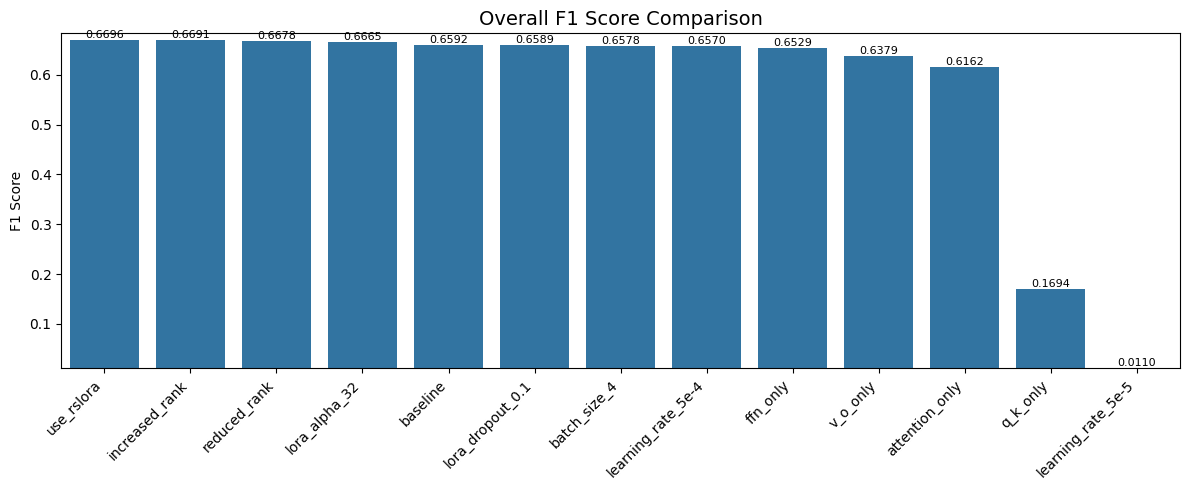

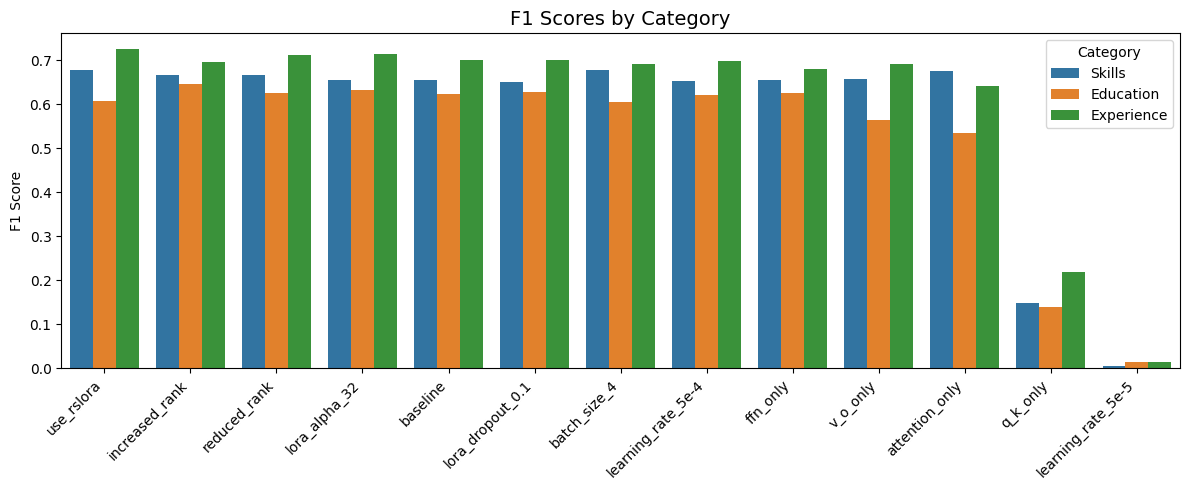

<ipython-input-33-a8c40c7e82d4>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='experiment', y='improvement', data=non_baseline_df, ax=ax3, palette=colors)


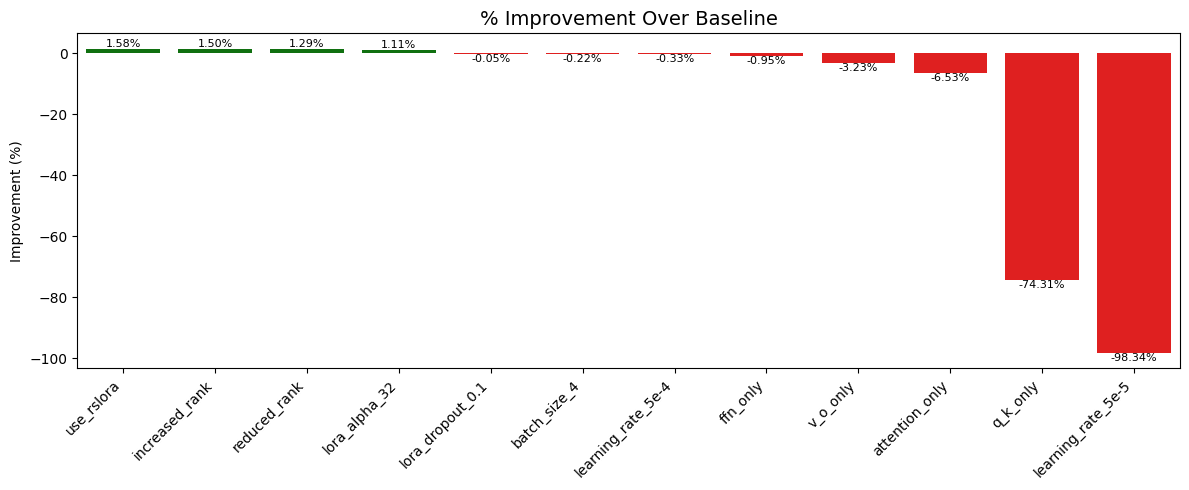

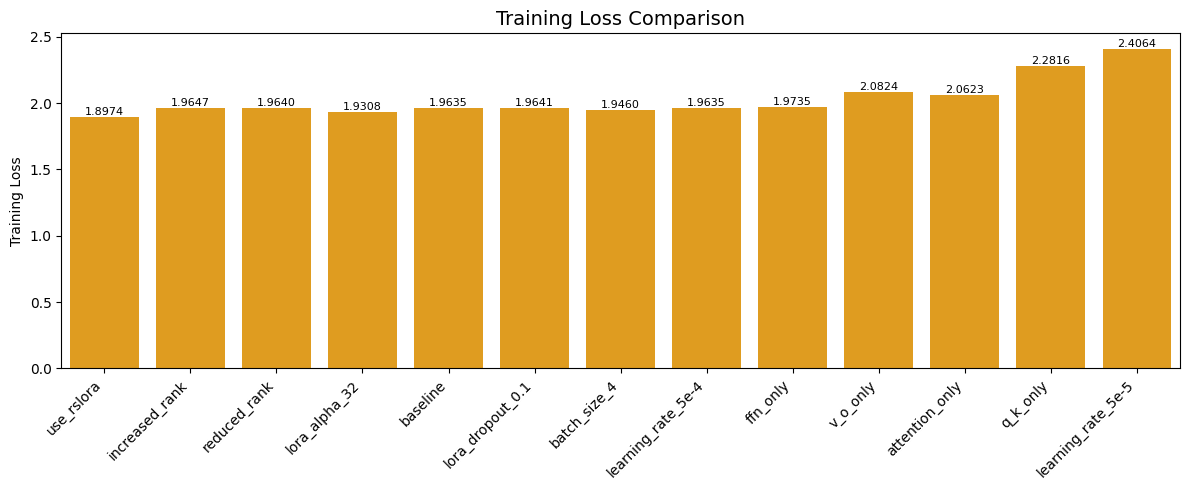

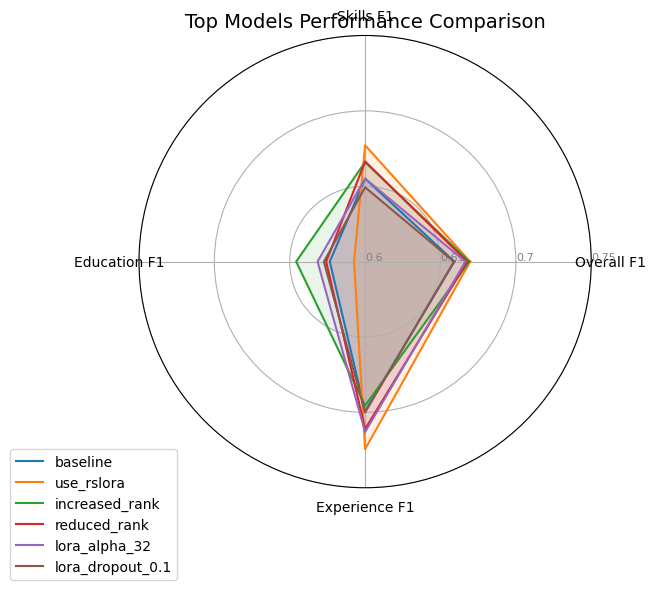

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def visualization(results):
    """
    Visualize LoRA experiment results with multiple plots.

    Args:
        results: Dictionary containing experiment results
    """
    # Extract data into a DataFrame for easier plotting
    data = []
    for exp_name, exp_data in results.items():
        metrics = exp_data['eval_metrics']
        data.append({
            'experiment': exp_name,
            'train_loss': exp_data['train_loss'],
            'f1_score': float(metrics['f1_score']),
            'skills_f1': float(metrics['skills_f1']),
            'education_f1': float(metrics['education_f1']),
            'experience_f1': float(metrics['experience_f1']),
            'r_value': exp_data['config']['r']
        })

    df = pd.DataFrame(data)

    # Sort by overall F1 score for better visualization
    df = df.sort_values('f1_score', ascending=False)

    # Calculate improvement over baseline
    baseline_f1 = df[df['experiment'] == 'baseline']['f1_score'].values[0]
    df['improvement'] = ((df['f1_score'] - baseline_f1) / baseline_f1) * 100

    # 1. Overall F1 score comparison
    plt.figure(figsize=(12, 5))
    ax1 = plt.gca()
    sns.barplot(x='experiment', y='f1_score', data=df, ax=ax1)
    ax1.set_title('Overall F1 Score Comparison', fontsize=14)
    ax1.set_xlabel('')
    ax1.set_ylabel('F1 Score')
    plt.xticks(rotation=45, ha='right')

    # Set y-axis limits to better show differences
    f1_min = df['f1_score'].min() * 0.98
    f1_max = df['f1_score'].max() * 1.02
    ax1.set_ylim(f1_min, f1_max)

    # Add value labels
    for i, v in enumerate(df['f1_score']):
        ax1.text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    # 2. Detailed F1 scores by category
    plt.figure(figsize=(12, 5))
    ax2 = plt.gca()

    # Melt the dataframe to create grouped bars
    melt_df = pd.melt(df,
                      id_vars=['experiment'],
                      value_vars=['skills_f1', 'education_f1', 'experience_f1'],
                      var_name='Category',
                      value_name='F1 Score')

    # Rename categories for legend
    melt_df['Category'] = melt_df['Category'].replace({
        'skills_f1': 'Skills',
        'education_f1': 'Education',
        'experience_f1': 'Experience'
    })

    sns.barplot(x='experiment', y='F1 Score', hue='Category', data=melt_df, ax=ax2)
    ax2.set_title('F1 Scores by Category', fontsize=14)
    ax2.set_xlabel('')
    ax2.set_ylabel('F1 Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. Percentage improvement over baseline
    plt.figure(figsize=(12, 5))
    ax3 = plt.gca()

    # Filter out baseline for improvement plot
    non_baseline_df = df[df['experiment'] != 'baseline']

    # Create a colormap based on positive/negative values
    colors = ['green' if x >= 0 else 'red' for x in non_baseline_df['improvement']]

    bars = sns.barplot(x='experiment', y='improvement', data=non_baseline_df, ax=ax3, palette=colors)
    ax3.set_title('% Improvement Over Baseline', fontsize=14)
    ax3.set_xlabel('')
    ax3.set_ylabel('Improvement (%)')
    plt.xticks(rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(non_baseline_df['improvement']):
        ax3.text(i, v, f"{v:.2f}%", ha='center', va='bottom' if v >= 0 else 'top', fontsize=8)

    plt.tight_layout()
    plt.show()

    # 4. Training loss comparison
    plt.figure(figsize=(12, 5))
    ax4 = plt.gca()
    sns.barplot(x='experiment', y='train_loss', data=df, ax=ax4, color='orange')
    ax4.set_title('Training Loss Comparison', fontsize=14)
    ax4.set_xlabel('')
    ax4.set_ylabel('Training Loss')
    plt.xticks(rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(df['train_loss']):
        ax4.text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    # 5. Create a radar chart for top models comparison
    plt.figure(figsize=(10, 6))

    # Select baseline and top 5 models for radar chart
    radar_models = ['baseline'] + df[df['experiment'] != 'baseline'].head(5)['experiment'].tolist()
    radar_df = df[df['experiment'].isin(radar_models)]

    # Prepare data for radar chart
    categories = ['f1_score', 'skills_f1', 'education_f1', 'experience_f1']
    categories_names = ['Overall F1', 'Skills F1', 'Education F1', 'Experience F1']

    # Number of variables
    N = len(categories)

    # Create angle for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Create subplot
    ax = plt.subplot(111, polar=True)

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories_names, size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.6, 0.65, 0.7, 0.75], ["0.6", "0.65", "0.7", "0.75"], color="grey", size=8)
    plt.ylim(0.6, 0.75)

    # Plot each model
    for i, model in enumerate(radar_models):
        model_data = radar_df[radar_df['experiment'] == model]
        values = model_data[categories].values.flatten().tolist()
        values += values[:1]  # Close the loop

        ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=model)
        ax.fill(angles, values, alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title("Top Models Performance Comparison", size=14)
    plt.tight_layout()
    plt.show()

# Example usage
visualization(ablation_results)

## Key Findings from Ablation Study

### Performance Improvements
- **use_rslora** provides the best overall performance with a **1.58%** improvement over baseline, achieving the highest F1 score of 0.6696
- **increased_rank** shows strong results with a **1.50%** improvement over baseline
- **reduced_rank** yields a **1.29%** improvement and **lora_alpha_32** provides a **1.11%** improvement over baseline
- The worst performers are **dLk_only** (-74.31%) and **learning_rate_5e-5** (-98.34%), which drastically underperform compared to baseline

### Architecture Insights
- All LoRA variant configurations (use_rslora, increased_rank, reduced_rank, lora_alpha_32) outperform the baseline model
- Adding dropout (lora_dropout_0.1) slightly decreases performance by 0.05% compared to baseline
- Batch size reduction and learning rate adjustments both slightly decrease performance
- Component-only tuning approaches (ffn_only, v_o_only, attention_only) all underperform compared to full model tuning

### Component Performance
- **Experience extraction** consistently has the highest F1 scores across all experiments (green bars in Image 2)
- **Education extraction** generally has the lowest F1 scores (orange bars in Image 2)
- **Skills extraction** performance (blue bars) falls between experience and education across configurations

### Training Loss Patterns
- The best performing models (use_rslora, lora_alpha_32) also have among the lowest training losses
- The worst performing models (dLk_only, learning_rate_5e-5) have significantly higher training losses
- There's a clear correlation between higher training loss and poorer F1 score performance

### Best Configurations
1. **use_rslora**: F1 = 0.6696, with balanced performance across skills, education, and experience
2. **increased_rank**: F1 = 0.6691, showing that increasing rank parameters can improve performance
3. **reduced_rank**: F1 = 0.6678, demonstrating that even reduced-rank models can outperform baseline

In [37]:
# Save ablation results to file
with open("ablation_results.json", "w") as f:
    json.dump(ablation_results, f, indent=2)

# Use the Best Params to Train

In [34]:
# Find best configuration
best_config = max(ablation_results.items(), key=lambda x: x[1]["eval_metrics"]["f1_score"])[0]
print(f"Best configuration: {best_config}")
best_config_params = ablation_results[best_config]["config"]
print(best_config_params)

Best configuration: use_rslora
{'name': 'use_rslora', 'r': 16, 'use_rslora': True, 'target_modules': ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']}


In [54]:
lora_r = best_config_params.get("r", 16)
target_modules = best_config_params.get("target_modules", ["q_proj", "k_proj", "v_proj", "o_proj",
                                             "gate_proj", "up_proj", "down_proj"])
lora_alpha = best_config_params.get("lora_alpha", 16)
lora_dropout = best_config_params.get("lora_dropout", 0)
use_rslora = best_config_params.get("use_rslora", False)
batch_size = best_config_params.get("batch_size", 2)
learning_rate = best_config_params.get("learning_rate", optimal_lr)

In [55]:
# Load fresh model
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/DeepSeek-R1-Distill-Llama-8B",
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit,
)

FastLanguageModel.for_training(model)
peft_model = FastLanguageModel.get_peft_model(
    model,
    r=lora_r,
    target_modules=target_modules,
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    use_rslora=use_rslora,
    random_state=3407,
)

# Configure for the best config
# FastLanguageModel.for_training(model)
# peft_model = FastLanguageModel.get_peft_model(
#     model,
#     r=best_config_params.get("r", 16),
#     target_modules=best_config_params.get("target_modules", ["q_proj", "k_proj", "v_proj", "o_proj",
#                                                            "gate_proj", "up_proj", "down_proj"]),
#     lora_alpha=best_config_params.get("lora_alpha", 16),
#     lora_dropout=best_config_params.get("lora_dropout", 0),
#     bias="none",
#     use_gradient_checkpointing="unsloth",
#     random_state=3407,
#     use_rslora=best_config_params.get("use_rslora", False),
#     loftq_config=None,
# )

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [56]:
print(len(dataset), len(train_dataset))

2257 2257


In [58]:
formatted_train = train_dataset.map(formatting_prompts_func, batched=True)

In [63]:
# trainer = SFTTrainer(
#     model=peft_model,
#     tokenizer=tokenizer,
#     train_dataset=train_dataset,
#     dataset_text_field="text",
#     max_seq_length=max_seq_length,
#     dataset_num_proc=2,
#     packing=False,
#     args=TrainingArguments(
#         per_device_train_batch_size=2,
#         gradient_accumulation_steps=4,
#         warmup_steps=5,
#         max_steps=50,
#         learning_rate=optimal_lr,
#         fp16=not is_bfloat16_supported(),
#         bf16=is_bfloat16_supported(),
#         logging_steps=1,
#         optim="adamw_8bit",
#         weight_decay=0.01,
#         lr_scheduler_type="linear",
#         seed=3407,
#         output_dir="outputs",
#         report_to="none",
#     ),
# )

# Train with this configuration
trainer = SFTTrainer(
    model=peft_model,
    tokenizer=tokenizer,
    train_dataset=formatted_train,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    args=TrainingArguments(
        per_device_train_batch_size=batch_size,
        gradient_accumulation_steps=4,
        warmup_steps=5,
        max_steps=500,
        learning_rate=learning_rate,
        fp16=not is_bfloat16_supported(),
        bf16=is_bfloat16_supported(),
        logging_steps=1,
        optim="adamw_8bit",
        weight_decay=0.01,
        lr_scheduler_type="linear",
        seed=3407,
        output_dir="outputs_final",
        report_to="none",
    ),
)

Unsloth: Tokenizing ["text"] (num_proc=12):   0%|          | 0/2257 [00:00<?, ? examples/s]

In [64]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,257 | Num Epochs = 2 | Total steps = 500
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)


## Evaluation

In [65]:
print(eval_dataset[0])

{'id': 16533554, 'category': 'INFORMATION-TECHNOLOGY', 'skills': 'Windows 2000, Windows 2003 Server and Professional, Windows XP, Dos 6.22, Citrix ICA, MS Exchange 2000, HP, IBM, Dell, Intel Based Server and Desktops, Cisco 2500 Switches, Sonic Wall Hardware VPNs, HP Laser Jets, Toshiba E-310 Color Copier, Toshiba and Sony Laptops, Inter-tel, MS Office, Visio, Citrix Metaframe XP, Symantec: PC Anywhere, Ghost, Antivirus, Winfax, McAfee Virus Scan, Adobe Acrobat, Illustrator, Photoshop, Partition Magic, TCP/IP, Wireless 802.11 a/b/g, DNS, WINS, DHCP', 'education': 'University of Maryland University College, Management Information Systems, Bachelor of Science', 'experience': 'Information Technology Manager / Network Engineer, Network Engineer, Network Support Technician', 'text': "INFORMATION TECHNOLOGY MANAGER / NETWORK ENGINEER Professional Overview A highly skilled and accomplished Information Technology Manager with over 16 years of expertise in planning, implementing and streamlinin

In [66]:
FastLanguageModel.for_inference(peft_model)

inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

outputs = peft_model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_new_tokens=10000,
    use_cache=True,
)

response = tokenizer.batch_decode(outputs)
print(response[0])

<｜begin▁of▁sentence｜>
# Role and Task

You are an experienced HR and now you will review a resume then extract key information from it.

# Input Format

The input is the resume text, and you will review it.

# Output Format

Your response should be ONLY in the following JSON format:
{
  "skills": array[string],
  "education": array[string],
  "experience": array[string]
}

Example:
{
  "skills": [
      "Accounting",
      "ads",
      "advertising",
      "analytical skills",
      "benefits",
      "billing",
      "budgeting",
      "clients",
      "Customer Service",
      "data analysis",
      "delivery",
      "documentation",
      "employee relations",
      "financial management",
      "government relations",
      "Human Resources",
      "insurance",
      "labor relations",
      "layout",
      "Marketing",
      "marketing collateral",
      "medical billing",
      "medical terminology",
      "office",
      "organizational",
      "payroll",
      "performance revie

In [67]:
final_metrics = evaluate_single_model(peft_model, tokenizer)
print(final_metrics)

Evaluating example 50/50...
Overall F1 Score: 0.6874
Skills F1 Score: 0.6769
Education F1 Score: 0.6628
Experience F1 Score: 0.7226
Error Rate: 0.0000
Error Count: 0
Total Examples Evaluated: 50
Error Types:
{'f1_score': np.float64(0.6874401838946835), 'skills_f1': np.float64(0.676888424565832), 'education_f1': np.float64(0.6628294225581104), 'experience_f1': np.float64(0.7226027045601083), 'error_rate': 0.0, 'error_count': 0, 'total_examples': 50, 'error_types': {}, 'parsing_methods': {'regex_extraction': 50}, 'example_results': [{'example_id': 0, 'input_text': "VICTIM ADVOCATE Professional Summary Social worker with more that five years of EXPERIENCE as Multicultural Victim Advocate and exceptional people SKILLS. Versed in advocacy and case management . Desires a challenging role as HR Generalist. Strategic planning and client relationship management expert. EXPERIENCE in counseling individuals of various ethnic and socio-economic backgrounds, including Latinos and immigrants from va

## Save Model as GGUF

In [68]:
from google.colab import userdata

HUGGINGFACE_TOKEN = userdata.get('HUGGINGFACE_TOKEN')

if True: model.save_pretrained_gguf("model", tokenizer,)
if False: model.save_pretrained_gguf("model_f16", tokenizer, quantization_method = "f16")
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "q4_k_m")

Unsloth: ##### The current model auto adds a BOS token.
Unsloth: ##### Your chat template has a BOS token. We shall remove it temporarily.
Unsloth: Kaggle/Colab has limited disk space. We need to delete the downloaded
model which will save 4-16GB of disk space, allowing you to save on Kaggle/Colab.
Unsloth: Will remove a cached repo with size 6.0G


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 46.58 out of 83.48 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 32/32 [00:00<00:00, 54.41it/s]


Unsloth: Saving tokenizer... Done.
Done.


Unsloth: Converting llama model. Can use fast conversion = False.


==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: CMAKE detected. Finalizing some steps for installation.
Unsloth: [1] Converting model at model into q8_0 GGUF format.
The output location will be /content/model/unsloth.Q8_0.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: model
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:rope_freqs.weight,           torch.float32 --> F32, shape = {64}
INFO:hf-to-gguf:gguf: loading model weight map from 'model.safetensors.index.json'
INFO:hf-to-gguf:gguf: loading model part 'model-00001-of-00004.safetensors

Unsloth: ##### The current model auto adds a BOS token.
Unsloth: ##### We removed it in GGUF's chat template for you.


Unsloth: Conversion completed! Output location: /content/model/unsloth.Q8_0.gguf


### Upload Model to HuggingFace


In [69]:
from huggingface_hub import create_repo

create_repo("C0ldSmi1e/resume-reader-best", token=HUGGINGFACE_TOKEN, exist_ok=True)

model.push_to_hub_gguf("C0ldSmi1e/resume-reader-best", tokenizer, token=HUGGINGFACE_TOKEN)

Unsloth: ##### The current model auto adds a BOS token.
Unsloth: ##### Your chat template has a BOS token. We shall remove it temporarily.


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 46.74 out of 83.48 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 32/32 [00:00<00:00, 66.18it/s]


Unsloth: Saving tokenizer... Done.
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: [1] Converting model at C0ldSmi1e/resume-reader-best into q8_0 GGUF format.
The output location will be /content/C0ldSmi1e/resume-reader-best/unsloth.Q8_0.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: resume-reader-best
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:rope_freqs.weight,           torch.float32 --> F32, shape = {64}
INFO:hf-to-gguf:gguf: loading model weight map from 'model.safetensors.index.json'
INFO:hf-to-gguf:gguf: loading model par

  0%|          | 0/1 [00:00<?, ?it/s]

unsloth.Q8_0.gguf:   0%|          | 0.00/8.54G [00:00<?, ?B/s]

Unsloth: ##### The current model auto adds a BOS token.
Unsloth: ##### We removed it in GGUF's chat template for you.


Saved GGUF to https://huggingface.co/C0ldSmi1e/resume-reader-best
